In [1]:
import numpy as np
import matplotlib.pyplot as plt
X=np.load('fruits_300.npy')

In [5]:
y=np.array([0 for _ in range(100)]+[1 for _ in range(100)]+[2 for _ in range(100)])

In [6]:
X.shape,y.shape

((300, 100, 100), (300,))

In [ ]:
v_X=X.reshape(-1,100*100)
s_x=v_X/255
s_x

In [9]:
from sklearn.model_selection import train_test_split
tr_x1,tt_x1,tr_y1,tt_y1=train_test_split(v_X,y,test_size=0.3)
tr_x2,tt_x2,tr_y2,tt_y2=train_test_split(s_x,y,test_size=0.3)

In [10]:
from sklearn.linear_model import LogisticRegression
m=LogisticRegression()
m.fit(tr_x1,tr_y1)
m.score(tr_x1,tr_y1),m.score(tt_x1,tt_y1)

(1.0, 1.0)

In [ ]:
from sklearn.model_selection import cross_val_score,cross_validate
m=LogisticRegression()
log=cross_validate(m,tr_x1,tr_y1)#스케일 안된
log1=cross_validate(m,tr_x2,tr_y2)#스캐일 된

In [19]:
log['test_score'].mean(),log['fit_time'].mean()

(0.980952380952381, 1.5062930107116699)

In [20]:
log1['test_score'].mean(),log1['fit_time'].mean()

(1.0, 2.5070276260375977)

In [58]:
from sklearn.decomposition import PCA
pca10=PCA(n_components=0.5)#실수:분포비율,정수:차원(피처)갯수
print(v_X.shape)
pca10.fit(v_X)

(300, 10000)


PCA(n_components=0.5)

In [59]:
pca10.components_.shape

(2, 10000)

In [60]:
pca_s_x=pca10.transform(v_X)

In [55]:
pca_s_x.shape

(300, 39)

In [ ]:
y

In [31]:
log['test_score'].mean(),log['fit_time'].mean()

(0.980952380952381, 1.5062930107116699)

In [32]:
log1['test_score'].mean(),log1['fit_time'].mean()

(1.0, 2.5070276260375977)

In [62]:
m=LogisticRegression()
log2=cross_validate(m,pca_s_x,y)
log2['test_score'].mean(),log2['fit_time'].mean()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

(0.9933333333333334, 0.028959178924560548)

In [42]:
def 출력함수(arr):
  n=len(arr)
  r=int(np.ceil(n/10))
  c=n if r<2 else 10
  f,ax = plt.subplots(r,c,squeeze=False)
  for i in range(r):
    for j in range(c):
      if i*10+j<n:
        ax[i,j].imshow(arr[i*10+j],cmap='gray_r')
      ax[i,j].axis('off')
  plt.show()

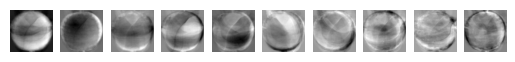

In [44]:
출력함수(pca10.components_.reshape(-1,100,100))

In [45]:
pca_s_x.shape

(300, 10)

In [46]:
i_p_x=pca10.inverse_transform(pca_s_x)
i_p_x.shape

(300, 10000)

In [ ]:
출력함수(i_p_x[100].reshape(-1,100,100))

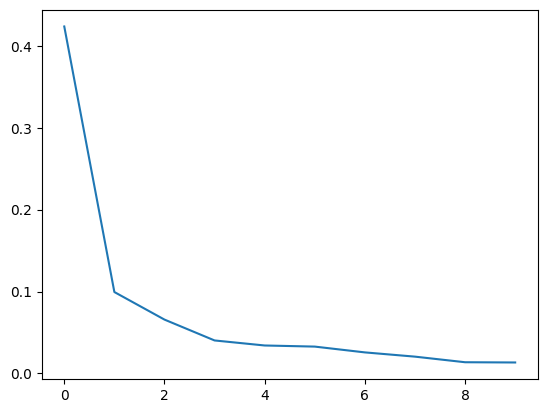

In [51]:
import matplotlib.pyplot as plt
plt.plot(pca10.explained_variance_ratio_)

In [ ]:
plt.scatter(pca_s_x[:,0],pca_s_x[:,1])

In [71]:
x0=pca_s_x[y==0]
x1=pca_s_x[y==1]
x2=pca_s_x[y==2]

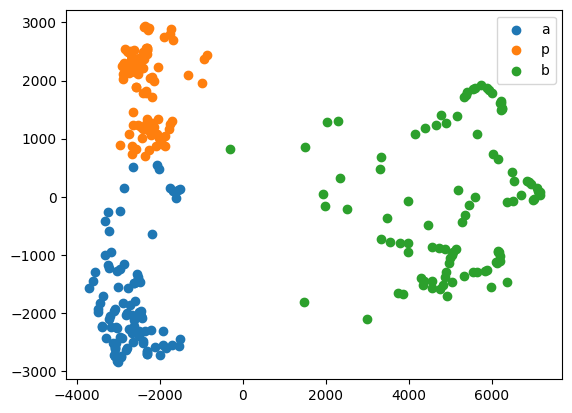

In [72]:
plt.scatter(x0[:,0],x0[:,1],label='a')
plt.scatter(x1[:,0],x1[:,1],label='p')
plt.scatter(x2[:,0],x2[:,1],label='b')
plt.legend()
plt.show()

In [76]:
from sklearn.cluster import KMeans
k_m=KMeans(3).fit(pca_s_x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y=k_m.labels_
y

In [80]:
x0=pca_s_x[y==0]
x1=pca_s_x[y==1]
x2=pca_s_x[y==2]

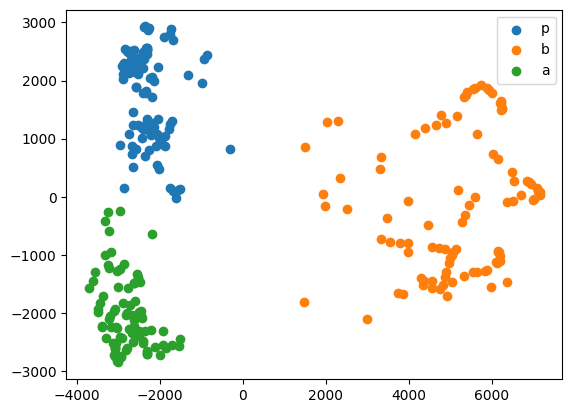

In [82]:
plt.scatter(x0[:,0],x0[:,1],label='p')
plt.scatter(x1[:,0],x1[:,1],label='b')
plt.scatter(x2[:,0],x2[:,1],label='a')
plt.legend()
plt.show()